In [ ]:

%load_ext autoreload
%autoreload 2

# Testing the new code

Works reasonably well, but should set all charges on the border for N < 12, which is doesnt do most of the time for N=10 and N=11. Probably has something to do with the params chosen for the simulated annealing. 

Simulated Annealing is an extension of the HillClimber class, which only accepts changes that result in a negative energy change, while SimulatedAnnealing sometimes accepts 'worse' solutions when temperature is high.

In [ ]:
from HillClimber import SimulatedAnnealing
from HillClimber import HillClimber
from charge_collection import ChargeCollection
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

Iteration 4999/5000, current energy: 48.63747543267294, T: 1.7984650426474056e-05                 
Output saved to 5000_N_11_iters_max_step_0.5_T0_1000_cooling_0.7


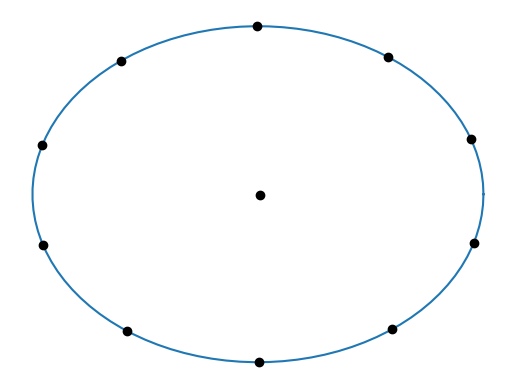

Iteration 4999/5000, current energy: 100.64638145824686, T: 1.7984650426474056e-05                
Output saved to 5000_N_15_iters_max_step_0.5_T0_1000_cooling_0.7


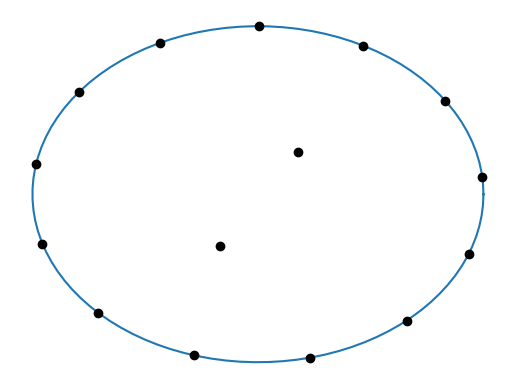

In [119]:
# Loop through simulated annealing function to produce multiple simulations
# Simulations of the same parameters were saved to the same file
# N_arr = range(8,20,4)
N_arr=[11,15]
cooling_rate = [0.3]

for n in N_arr:
    for c in cooling_rate:
        for i in range(1):
            random_charges = ChargeCollection(n)
            simulated_annealing = SimulatedAnnealing(random_charges,max_stepsize = 0.5, cooling_rate=c)
            simulated_annealing.run(iterations=5000,verbose=True, animate=False, save=True)

            # save image if needed
            simulated_annealing.charges.plot_charges(random_charges)
            plt.axis('off')
            plt.savefig('N{} I{} c{}.png'.format(n,5000,c))
            plt.show()
        

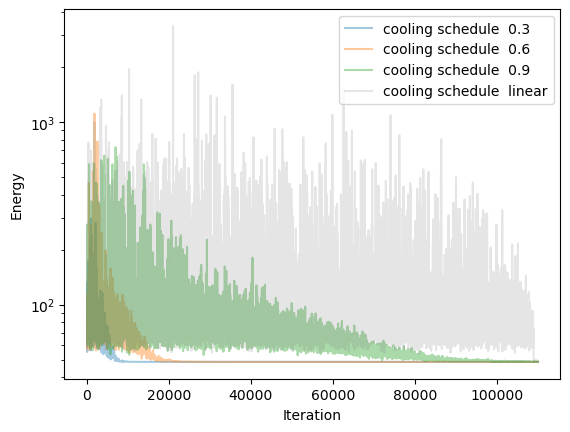

In [128]:
# Iteration and energy

files = os.listdir('data')

for file in files:
    if ('_11_' in file)&('10000' in file)&('Copy' in file):

        df = pd.read_csv(os.path.join('data',file))
        file = file.replace(".csv","").replace(" - Copy","")
        params = file.split('_')

        try:
            cooling = round(float(params[-1]),2)
        except:
            cooling = params[-1]

        if cooling == 'linear':
            plt.plot(df.index,df["# energy"],label = "cooling schedule  {}".format(cooling),alpha=0.2,c='grey')
        else:
            plt.plot(df.index,df["# energy"],label = "cooling schedule  {}".format(cooling),alpha=0.4)
plt.legend(loc='best')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.yscale('log',base=10)
# plt.ylim(0,200)
# plt.xlim(0,210)
plt.savefig('N11 cooling rate changes single sim.png')
plt.show()

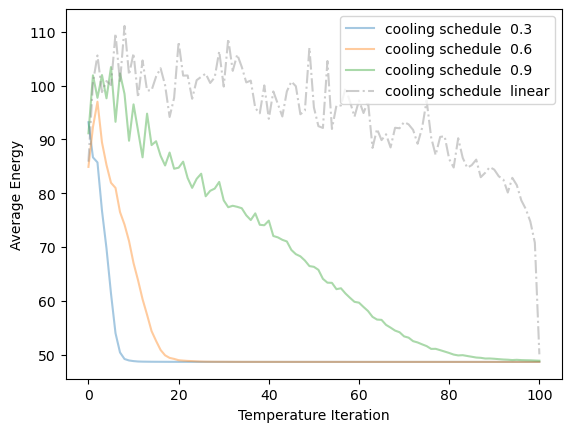

In [126]:
files = os.listdir('data')
files

for file in files:
    if ('_11_' in file)&('10000' in file)&('Copy' not in file):

        df = pd.read_csv(os.path.join('data',file))
        file = file.replace(".csv","")
        params = file.split('_')

        df_g = df.groupby(' temperature',as_index=False).agg({'# energy':'mean'})
        
        try:
            cooling = round(float(params[-1]),2)
        except:
            cooling = params[-1]

        if cooling == 'linear':
            plt.plot(df_g.index,df_g["# energy"][::-1],label = "cooling schedule  {}".format(cooling),alpha=0.4,c='grey',linestyle = 'dashdot')
        else:
            plt.plot(df_g.index,df_g["# energy"][::-1],label = "cooling schedule  {}".format(cooling),alpha=0.4)
plt.legend(loc='upper right')
plt.xlabel('Temperature Iteration')
plt.ylabel('Average Energy')
# plt.yscale('log',base=10)
# plt.ylim(0,200)
# plt.xlim(0,210)
plt.savefig('N11 cooling rate sim average new.png')
plt.show()

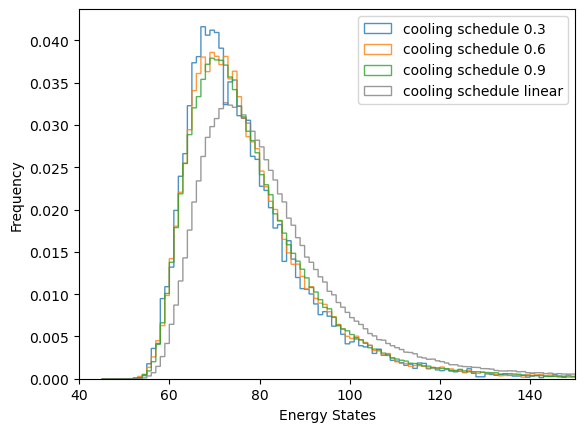

In [123]:
import os
import pandas as pd
import matplotlib.pyplot as plt
files = os.listdir('data')
files

for file in files:
    if ('_11_' in file)&('10000' in file)&('Copy' not in file):
        
        # print(file)
        df = pd.read_csv(os.path.join('data',file))
        df = df.loc[df[' temperature']>5]
        # print(df.head)
        file = file.replace(".csv","").replace(" - Copy","")
        params = file.split('_')
        if params[-1]=='linear':
            plt.hist(df["# energy"],bins=np.arange(45, 2000,1),density=True,label = "cooling schedule {}".format(params[-1]),color='grey',alpha=0.8,histtype='step') #bins=np.arange(45, 2000,10)
        else:
            plt.hist(df["# energy"],bins=np.arange(45, 2000,1),density=True,label = "cooling schedule {}".format(round(float(params[-1]),2)),alpha=0.8,histtype='step')
plt.legend(loc='best')
plt.xlim(40,150)
# plt.xscale('log')
plt.xlabel('Energy States')
plt.ylabel('Frequency')
plt.savefig('N11 hist cooling all sims.png'.format(params[-1]))
plt.show()